In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets


In [4]:
iris = datasets.load_iris()

X = iris.data

X_std = StandardScaler().fit_transform(X)

In [5]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


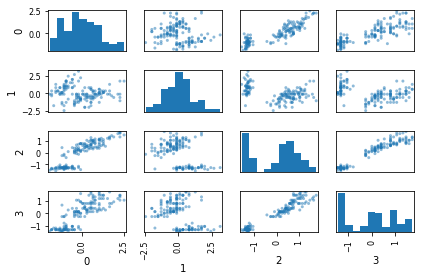

In [6]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [8]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigen Values 
%s [2.93035378 0.92740362 0.14834223 0.02074601]


In [9]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [10]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.77045209  95.80097536  99.48480732 100.        ]


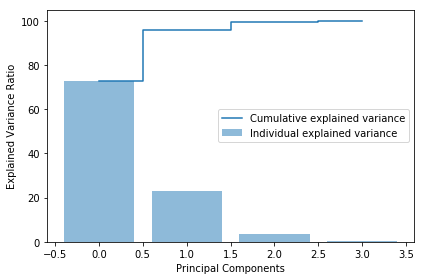

In [11]:
plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [12]:
# First three principal components explain 99% of the variance in the data. The first three PCA is shown below
# The three PCA will have to be named because they represent composite of original dimensions

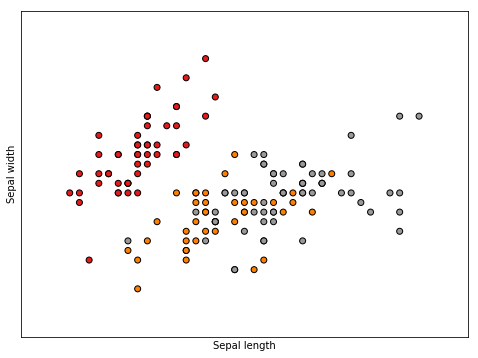

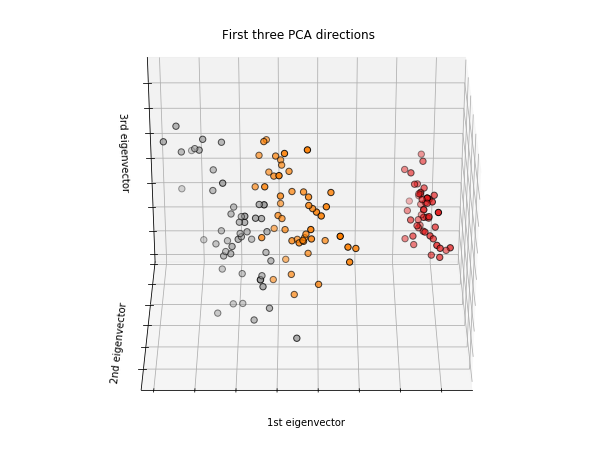

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=90)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [14]:
# Source - http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html